In [32]:
import os
import numpy as np
import pandas as pd

data_dir = '/data/CS120/'

subjects = os.listdir(data_dir)

app_subject = []
app_all = np.array([])
for subj in subjects:
    filename = data_dir + subj + '/app.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, delimiter='\t', header=None)
        app_all = np.append(app_all, data[2][:])
        app_subject.append(np.unique(data[2][:]))

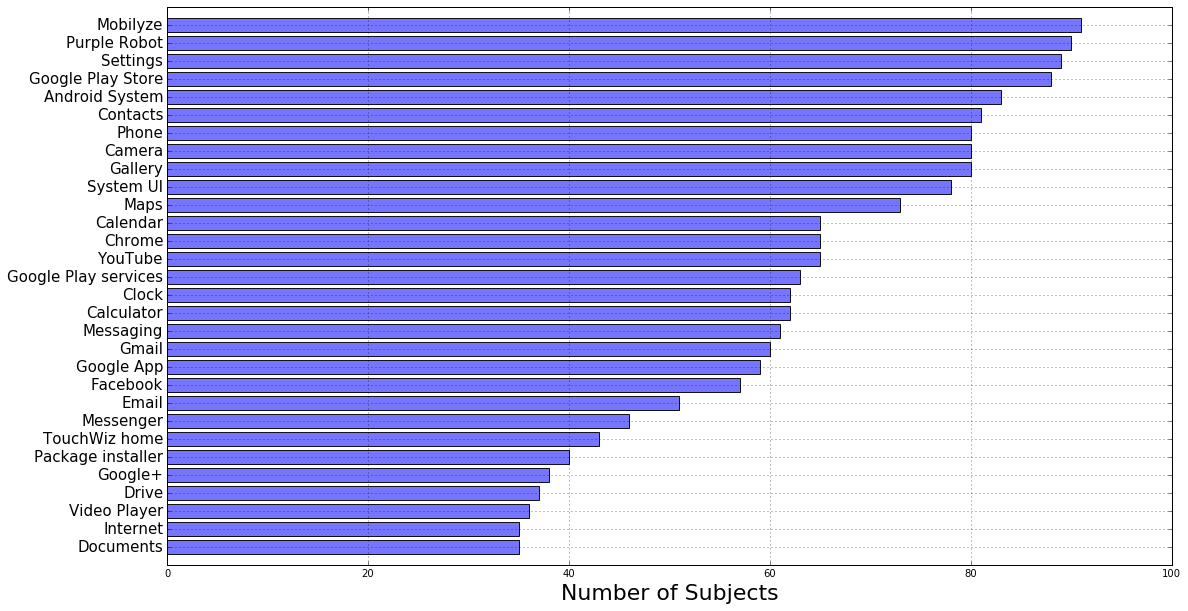

In [47]:
# finding number of subjects who used each location
import pickle

app_all_uniq = np.unique(app_all)
freq = np.zeros(app_all_uniq.size)
for (i,app_uniq) in enumerate(app_all_uniq):
    for app_subj in app_subject:
        if app_uniq in app_subj:
            freq[i] += 1

app_all_uniq = app_all_uniq[np.where(freq>30)]
freq = freq[np.where(freq>30)]

ind_sort = np.argsort(freq)
app_all_uniq = app_all_uniq[ind_sort]
freq = freq[ind_sort]

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,10))
show_from = 0
plt.barh(range(len(app_all_uniq)-show_from), freq[show_from:], align='center', color=(.4,.4,1), alpha=0.9)
plt.xlabel('Number of Subjects',fontsize=22)
axes = plt.gca()
axes.set_ylim([-1, len(app_all_uniq)-show_from]);
plt.yticks(np.arange(0,len(app_all_uniq)-show_from), app_all_uniq[show_from:], fontsize=15, color=(0,0,0));
plt.grid()

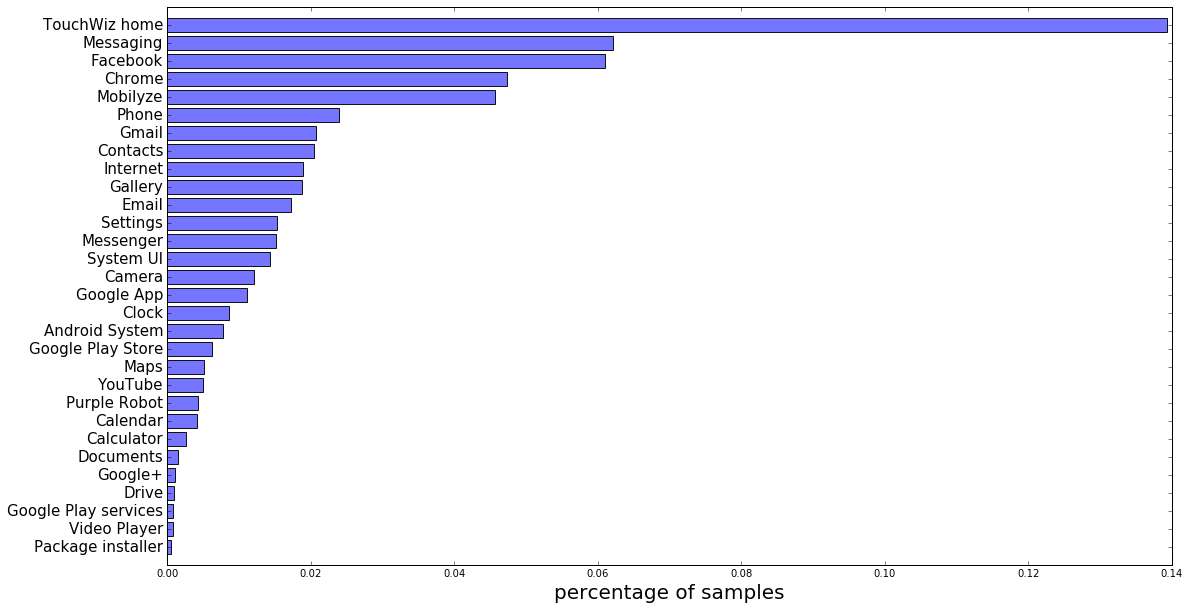

In [46]:
# finding the number of samples for each location in all subjects
# this will be roughly equivalent to the average percentage of time spent at that location across the subjects

app_all_uniq = np.unique(app_all)

# filtering based on freq > 1
freq = np.zeros(app_all_uniq.size)
for (i,app_uniq) in enumerate(app_all_uniq):
    for app_subj in app_subject:
        if app_uniq in app_subj:
            freq[i] += 1
            
app_all_uniq = app_all_uniq[np.where(freq>30)]

perc = np.array([])
for app_uniq in app_all_uniq:
    inds = np.where(app_all==app_uniq)[0]
    perc = np.append(perc, inds.size/float(app_all.size))
ind_sort = np.argsort(perc)
app_all_uniq = app_all_uniq[ind_sort]
perc = perc[ind_sort]

plt.figure(figsize=(18,10))
show_from = 0
plt.barh(range(len(app_all_uniq)-show_from), perc[show_from:], align='center', color=(.4,.4,1), alpha=0.9)
plt.xlabel('percentage of samples',fontsize=20)
axes = plt.gca()
axes.set_ylim([-1, len(app_all_uniq)-show_from])
plt.yticks(range(len(app_all_uniq)-show_from), app_all_uniq[show_from:], fontsize=15, color=(0,0,0));

In [128]:
print loc_all_uniq

['"gas station "' '"Credit Union"' '"Hair salon"'
 '"Vehicle", "Food (Restaurant, Cafe)"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Spiritual (Church, Temple, Etc.)"'
 '"hotel", "Food (Restaurant, Cafe)"' '"Shop or Store", "Vehicle"' '"DMV"'
 '"casino"' '"school", "school"'
 '"Outdoors & Recreation", "Nightlife Spot (Bar, Club)"' '"dog groomer"'
 '"church"' '"Outdoors & Recreation", "Shop or Store"' '"Pharmacy"'
 '"chiropractor"' '"Vehicle", "Work"' '"college "'
 '"Vehicle", "Shop or Store"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Shop or Store"'
 '"Outdoors & Recreation", "Gym or Other Exercise"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Food (Restaurant, Cafe)", "Nightlife Spot (Bar, Club)"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Food (Restaurant, Cafe)"'
 '"nails"' '"neighborhood"' '"library "' '"Laundromat"'
 '"Professional or Medical Office", "Shop or Store"' '"hair salon"'
 '"Food (Restaurant, Cafe)", "Arts & Entertainm